In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tfac.figures.figureCommon import subplotLabel, getSetup
from tfac.tensor import cp_decomp, find_R2X_parafac, reorient_factors
from tfac.Data_Mod import form_tensor
from tfac.figures.figure1 import treatmentPlot, timePlot, proteinPlot, R2X_figure

def z_score_tensor_bymeasure(tensor):
    for treatment in tensor:
        for time in treatment:
            mean_val = np.mean(time)
            sd_val = np.std(time)
            for i in range(time.shape[0]):
                time[i] = ((time[i] - mean_val) / sd_val)
    return tensor

def z_score_tensor_byprotein(tensor):
    for prot_idx in range(tensor.shape[2]):
        prot_list = []
        for treat_idx in range(tensor.shape[0]):
            for time_idx in range(tensor.shape[1]):
                prot_list.append(tensor[treat_idx][time_idx][prot_idx])
        mean_val = np.mean(prot_list)
        std_val = np.std(prot_list)
        for treat_idx in range(tensor.shape[0]):
            for time_idx in range(tensor.shape[1]):
                tensor[treat_idx][time_idx][prot_idx] = (tensor[treat_idx][time_idx][prot_idx] - mean_val) / std_val
    return tensor

In [2]:
tensor, treatments, times = form_tensor()
results = cp_decomp(tensor, 13)
comps = reorient_factors(results[1])

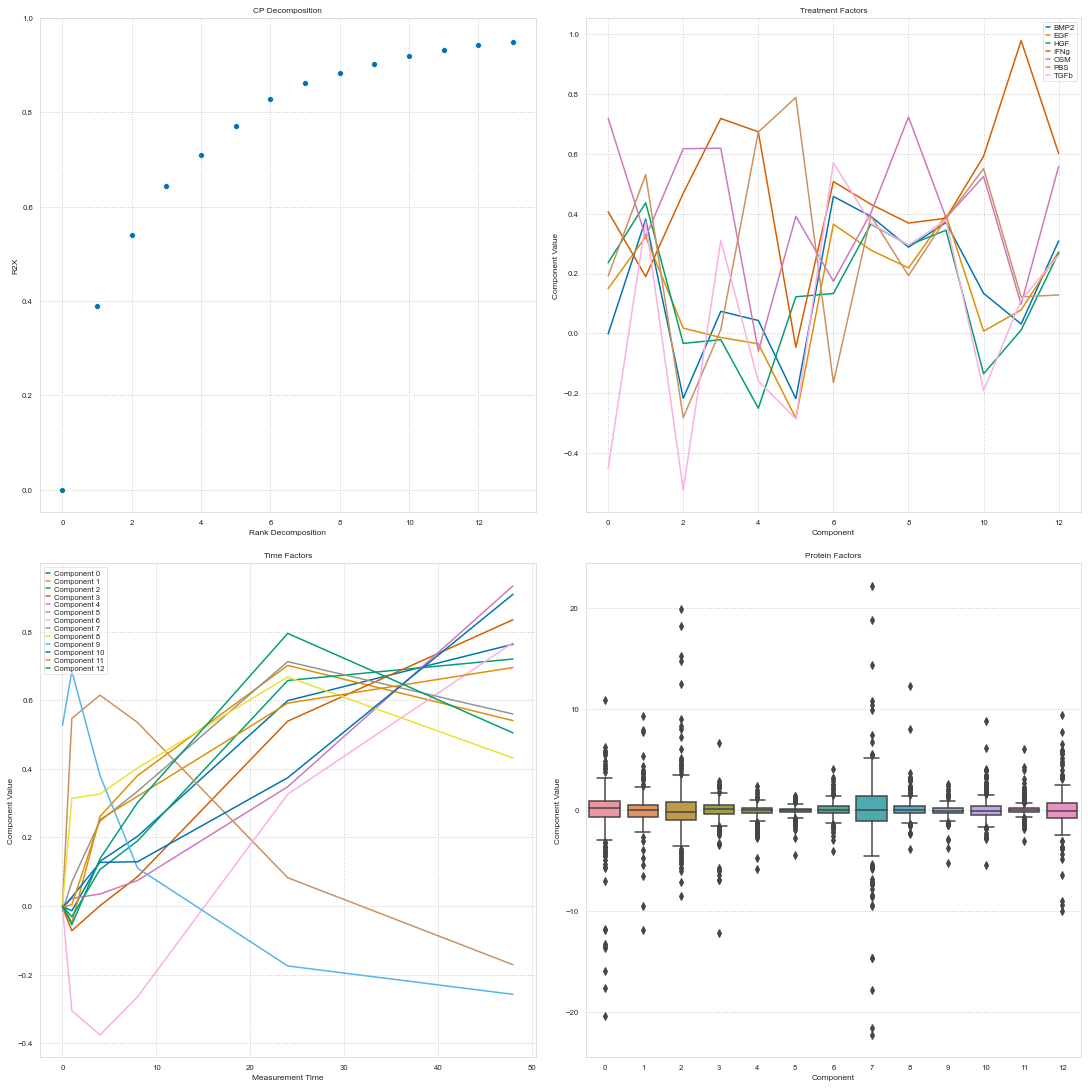

In [3]:
ax, f = getSetup((15, 15), (2, 2))
R2X_figure(ax[0], tensor)
treatmentPlot(ax[1], comps[0], treatments)
timePlot(ax[2], comps[1])
proteinPlot(ax[3], comps[2], 1, 2)

In [4]:
tensor, treatments, times = form_tensor()
zscore_tensor_bymeasurement = z_score_tensor_bymeasure(tensor)
results = cp_decomp(zscore_tensor_bymeasurement, 13)
comps = reorient_factors(results[1])



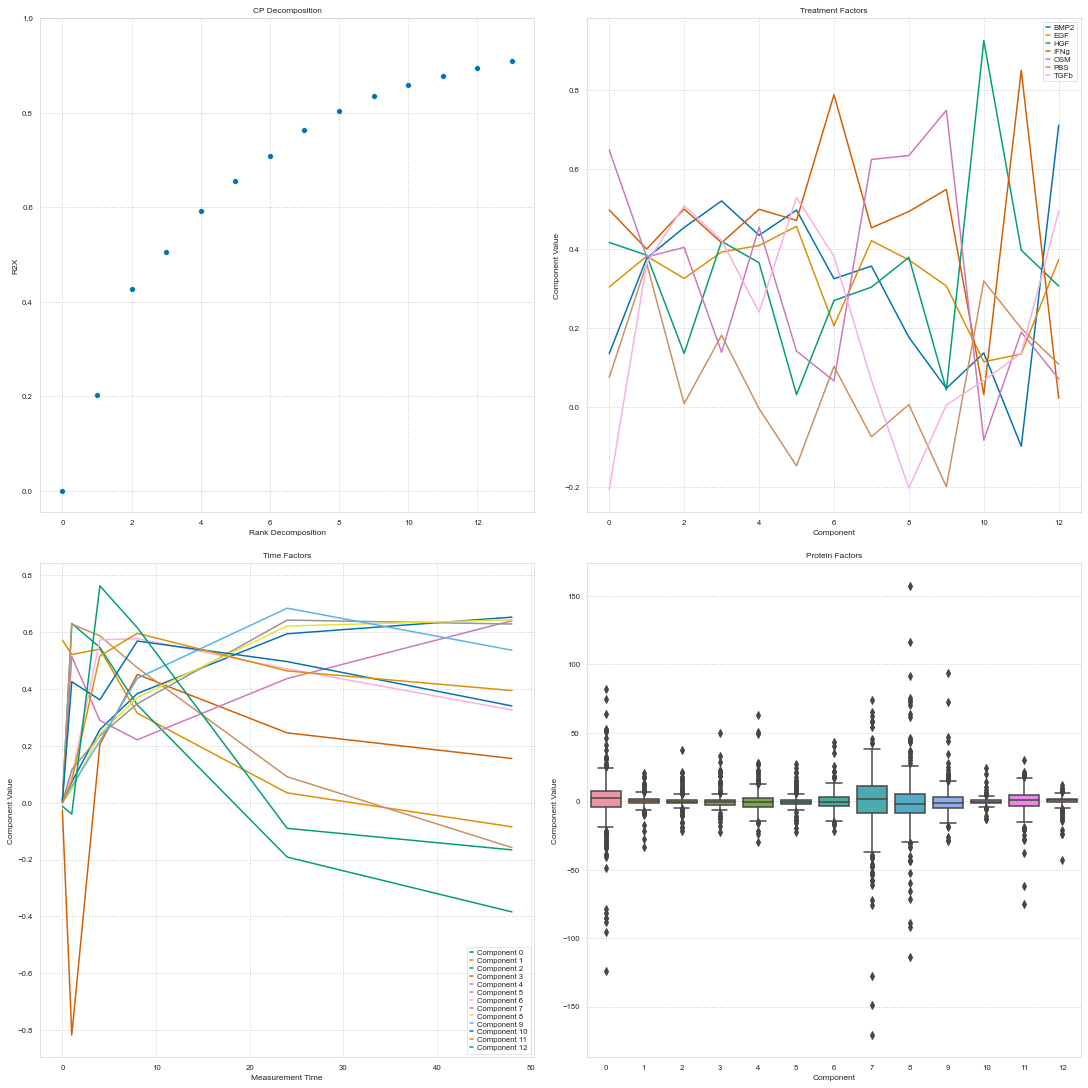

In [5]:
ax, f = getSetup((15, 15), (2, 2))
R2X_figure(ax[0], zscore_tensor_bymeasurement)
treatmentPlot(ax[1], comps[0], treatments)
timePlot(ax[2], comps[1])
proteinPlot(ax[3], comps[2], 1, 2)


In [6]:
tensor, treatments, times = form_tensor()
zscore_tensor_byprotein = z_score_tensor_byprotein(tensor)
results = cp_decomp(zscore_tensor_byprotein, 13)
comps = reorient_factors(results[1])

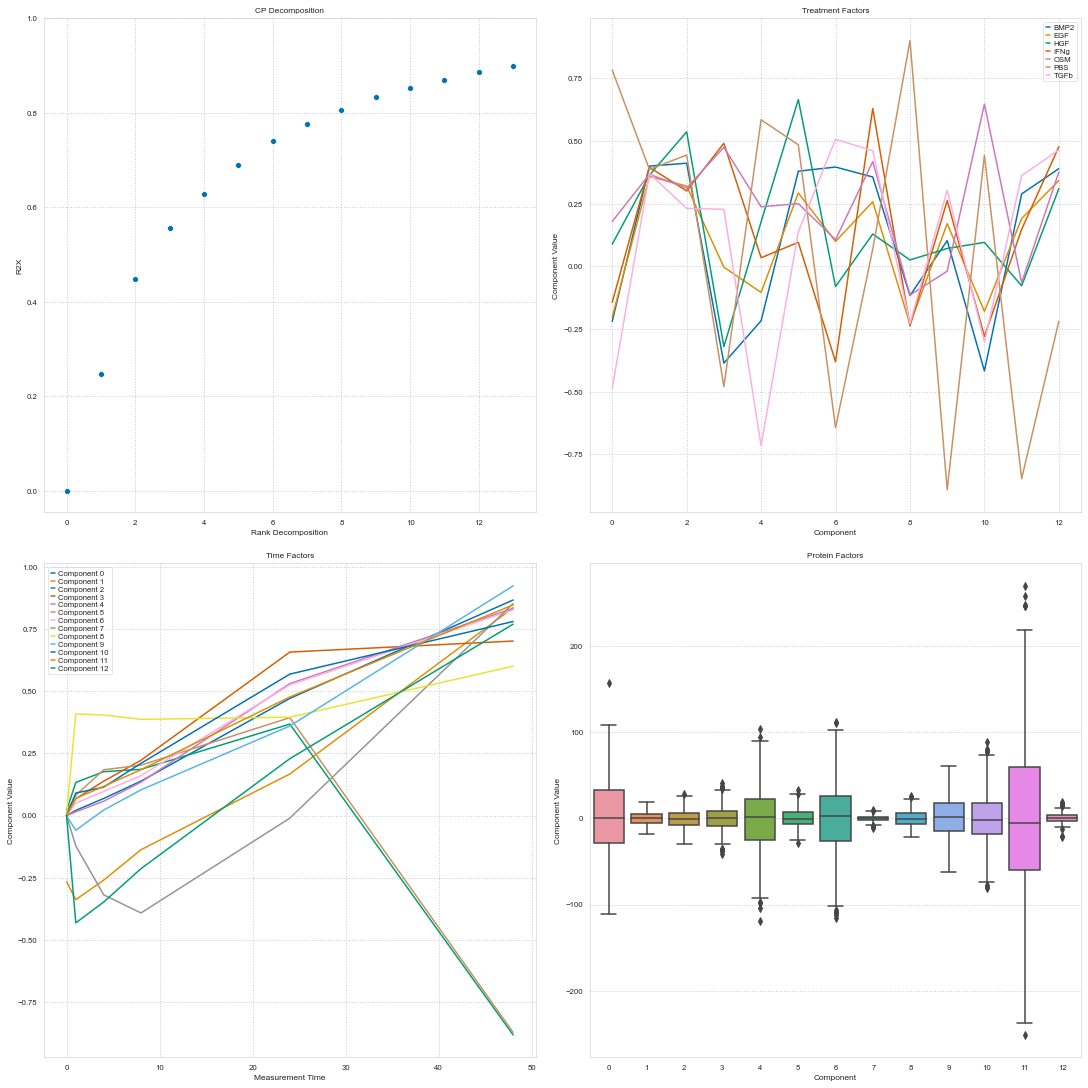

In [7]:
ax, f = getSetup((15, 15), (2, 2))
R2X_figure(ax[0], zscore_tensor_byprotein)
treatmentPlot(ax[1], comps[0], treatments)
timePlot(ax[2], comps[1])
proteinPlot(ax[3], comps[2], 1, 2)


In [8]:
df = pd.DataFrame(comps[2])
from tfac.dataHelpers import importLINCSprotein

proteins = importLINCSprotein()
columns = proteins.columns[3:298]

df["Proteins"] = columns

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
prots = {}
for i in range(df.columns.size - 1):
    print(Q1[i] - 1.5*IQR[i], Q3[i] + 1.5*IQR[i])
    for row, col in df.iterrows():
        if((col[i]< (Q1[i] - 1.5 * IQR[i])) or (col[i] > (Q3[i] + 1.5 * IQR[i]))):
            if col["Proteins"] not in prots:
                prots[col["Proteins"]] = 1
            else:
                prots[col["Proteins"]] += 1
            print(col["Proteins"], '                ', np.round(col[i], 2))
    print()
display(prots)

-120.57995093914278 124.70144358561977
Annexin-I-M-V                  156.87

-20.01037960483341 19.49474841000829

-29.716466502591263 28.35761064959275
c-Kit-R-V                  28.65

-34.68201117289825 33.63972484335005
Annexin-I-M-V                  -35.63
ATM_pS1981-R-V                  35.75
B7-H4-R-C                  36.64
c-Abl-R-V                  -41.74
c-Kit-R-V                  -35.25
Cox-IV-R-V                  -37.37
E2F1-M-V                  40.7
JNK2-R-C                  -37.46
S6-M-V                  37.23
TWIST-M-C                  33.95
XBP-1-G-C                  -36.05

-95.90288465937442 93.70660886114881
Annexin-I-M-V                  -118.68
ATM_pS1981-R-V                  94.44
c-Abl-R-V                  -103.95
JNK2-R-C                  -97.24
S6-M-V                  103.14
XBP-1-G-C                  -97.97

-27.087518244528926 28.624339902595054
B7-H4-R-C                  28.71
c-Kit-R-V                  -29.18
E2F1-M-V                  32.39

-104.949288693

{'Annexin-I-M-V': 5,
 'c-Kit-R-V': 6,
 'ATM_pS1981-R-V': 2,
 'B7-H4-R-C': 3,
 'c-Abl-R-V': 6,
 'Cox-IV-R-V': 1,
 'E2F1-M-V': 4,
 'JNK2-R-C': 6,
 'S6-M-V': 5,
 'TWIST-M-C': 1,
 'XBP-1-G-C': 5,
 'c-Jun_pS73-R-V': 1,
 'Heregulin-R-V': 1,
 'LC3A-B-R-C': 1,
 'Mcl-1-R-V': 1,
 'U-Histone-H2B-R-C': 1,
 'YAP_pS127-R-V': 1,
 'ACC_pS79-R-V': 1,
 'Akt_pS473-R-V': 1,
 'Akt_pT308-R-V': 1,
 'AMPKa_pT172-R-C': 1,
 'FAK_pY397-R-V': 1,
 'p38_pT180_Y182-R-V': 1,
 'Tuberin_pT1462-R-V': 1,
 'UBAC1-R-V': 1}